# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

In [2]:
updated_par = {'phi_G': 0.4,         # mixed financing of fiscal policy shock
                'jump_eg': 0.00,    # government spending shock
                'jump_eg_transfer': 0.01, # transfer shock
                'rho_eg_transfer': 0.9,
                'jump_em': 0.0,
                'beta_mean': 0.998148781410423180382451846526, # 0.99801530464021903644,
                'sigma_e': 0.407581285317861752304224864929, # 0.41634930488891835898,
                'A_L_ratio': 0.930370661686845124016542740719, # 0.929, # 0.92864578790992269308,
                'taylor': 'linear'}
model = HANKStickyModelClass(name='baseline', par={**updated_par ,**{'inattention': 0.0, 'start_dbeg_opti': True}})

In [3]:
model2 = HANKStickyModelClass(name='baseline')
model2.load()

In [4]:
for key, value in model2.par.__dict__.items():
    model.par.__dict__[key] = value
for key, value in model2.ss.__dict__.items():
    model.ss.__dict__[key] = value


In [5]:
model.ss.__dict__['Kd'] = model.ss.__dict__['K']
model.ss.__dict__['clearing_K'] = model.ss.__dict__['clearing_Y']

In [14]:
relevant_settings = {
    'beta': 'beta_mean',
    'T': 'T',
    'MPC target': 'MPC_target',
    'sigma_e': 'sigma_e',
    'A_L_ratio': 'A_L_ratio'
}
for key, value in relevant_settings.items():
    print(f'{key}: {model.par.__dict__[value]:.30f}')

beta: 0.998148781410423180382451846526
T: 350.000000000000000000000000000000
MPC target: 0.525000000000000022204460492503
sigma_e: 0.407581285317861752304224864929
A_L_ratio: 0.930370675550448278379178645991


In [3]:
model.find_ss(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 9.3 secs [854 iterations]
household problem in ss simulated in 1.4 secs [559 iterations]
steady state found in 17.0 mins 52 secs
 beta   = 0.9981
 nu     = 0.6904
Discrepancy in L =   0.00000000
Discrepancy in Y =  -0.00000000
Discrepancy in hh wealth =  -0.00000000
Discrepancy from annual MPC target of 0.525 =  -0.00000001


In [56]:
# model.name = 'low_wealth'
# model.save()

In [16]:
print(f'beta_grid: {model.par.beta_grid[0]:.20f}')
print(f'sigma_e: {model.par.sigma_e:.20f}')
print(f'par.A_L_ratio: {model.par.A_L_ratio:.20f}')

beta_grid: 0.99814878141042318038
sigma_e: 0.40758128531786175230
par.A_L_ratio: 0.93037067555044827838


In [20]:
print(f'ss.L_hh: {model.ss.L_hh}')
print(f'ss.A_hh: {model.ss.A_hh}')
print(f'hh wealth: {model.ss.A + model.ss.L}')

ss.L_hh: 1.0639362819657632
ss.A_hh: 14.21606392241102
hh wealth: 15.279999999999998
hh wealth: 2.0437678571738616e-07


In [4]:
print(f'clearing L: {model.ss.clearing_L}')
print(f'clearing L * xi: {model.ss.clearing_L * model.par.xi}')
print(f'clearing wealth: {model.ss.clearing_wealth}')
print(f'clearing Y: {model.ss.clearing_Y}')
print(f'MPC target: {model.ss.MPC_target}')

clearing L: 2.0650148258027912e-14
clearing L * xi: 3.3130095660628243e-16
clearing wealth: -2.6645352591003757e-14
clearing Y: -1.5543122344752192e-15
MPC target: -9.001334233538216e-09


In [5]:
ss = model.ss
par = model.par

In [5]:
model.par.taylor = 'multiplicative'
model.par.taylor

'multiplicative'

In [6]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 7.3 secs
curly_Y and curly_D calculated for ez              in 5.6 secs
curly_Y and curly_D calculated for ra              in 5.5 secs
curly_Y and curly_D calculated for rl              in 5.6 secs
curly_Y and curly_D calculated for tau             in 5.6 secs
curly_Y and curly_D calculated for wN              in 5.6 secs
curly_E calculated in 3.6 secs
builiding blocks combined in 2.3 secs
household Jacobian computed in 41.3 secs

full Jacobians:
full Jacobian to unknowns computed in 20.5 secs [in evaluate_path(): 17.0 secs]
full Jacobian to shocks computed in 5.2 secs [in evaluate_path(): 0.8 secs]


In [7]:
# print('Annual MPC:')
# print(np.sum([model.jac_hh[('C_hh', 'eg_transfer')][i, 0] / (1 + ss.r) ** i for i in range(4)]))

In [8]:
# model.find_transition_path(do_print=True, do_print_unknowns=False)

In [9]:
par = model.par
ss = model.ss

shock_jumps = ['jump_eg', 'jump_eg_direct', 'jump_eg_distribution', 'jump_eg_debt', 'jump_eg_transfer', 'jump_em',
               'jump_ez']
shocks_rho = ['rho_eg', 'rho_eg_direct', 'rho_eg_distribution', 'rho_eg_debt', 'rho_eg_transfer', 'rho_em', 'rho_ez']
# shock_settings for tax financed shock
phi_G = 0.0
tax_jump = 0.01
tax_rho = 0.90
set_shocks = ['jump_eg', 'jump_eg_direct', 'jump_eg_distribution', 'jump_eg_debt']
# Aggregate spending increase
T_max = par.T
delta_G = 0.01 * 0.90 ** np.arange(T_max)
print(
    f'Shock with parameters jump = {tax_jump}, rho = {tax_rho} leads to a total spending increase of {delta_G.sum() * 100:.2f}%')
# set shocks
for i_s, s in enumerate(shock_jumps):
    jump = tax_jump if s in set_shocks else 0.0
    rho = tax_rho if s in set_shocks else 0.0
    model.par.__dict__[s] = jump
    model.par.__dict__[shocks_rho[i_s]] = rho
model.par.phi_G = phi_G

Shock with parameters jump = 0.01, rho = 0.9 leads to a total spending increase of 10.00%


In [10]:
model.find_IRFs()

### shocks ###


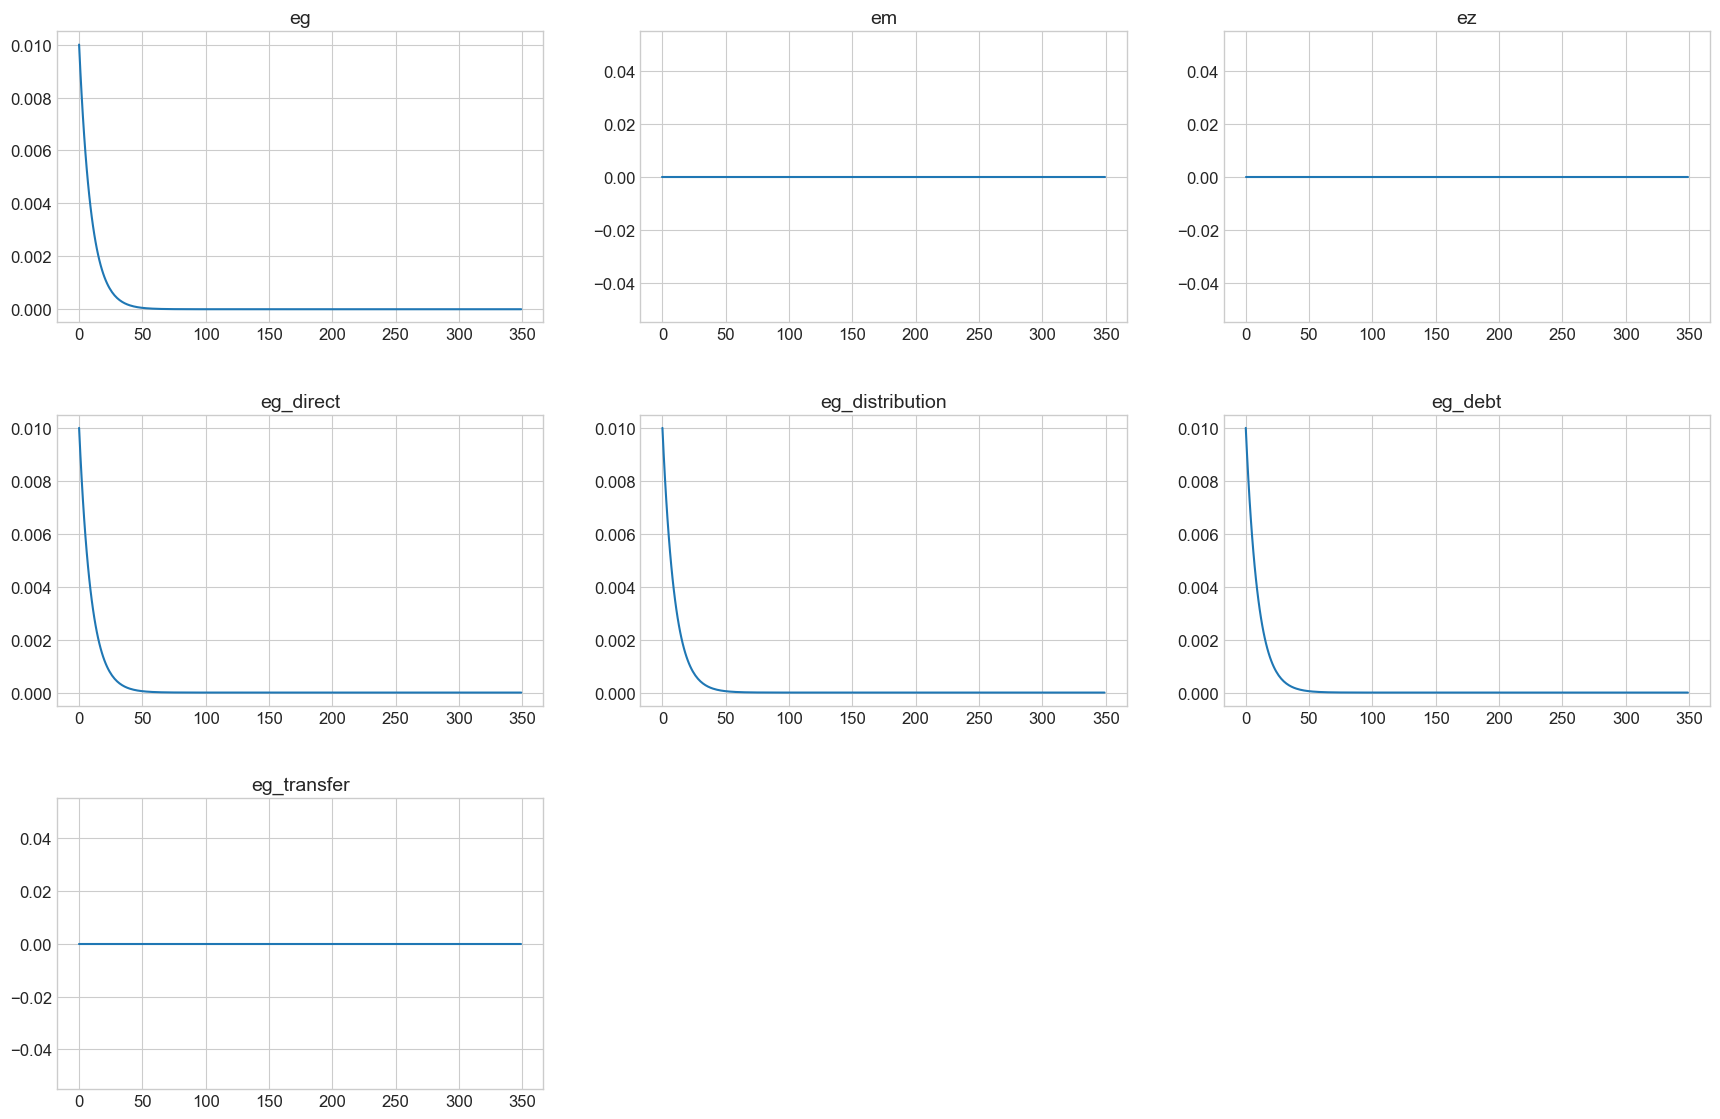


### varnames ###


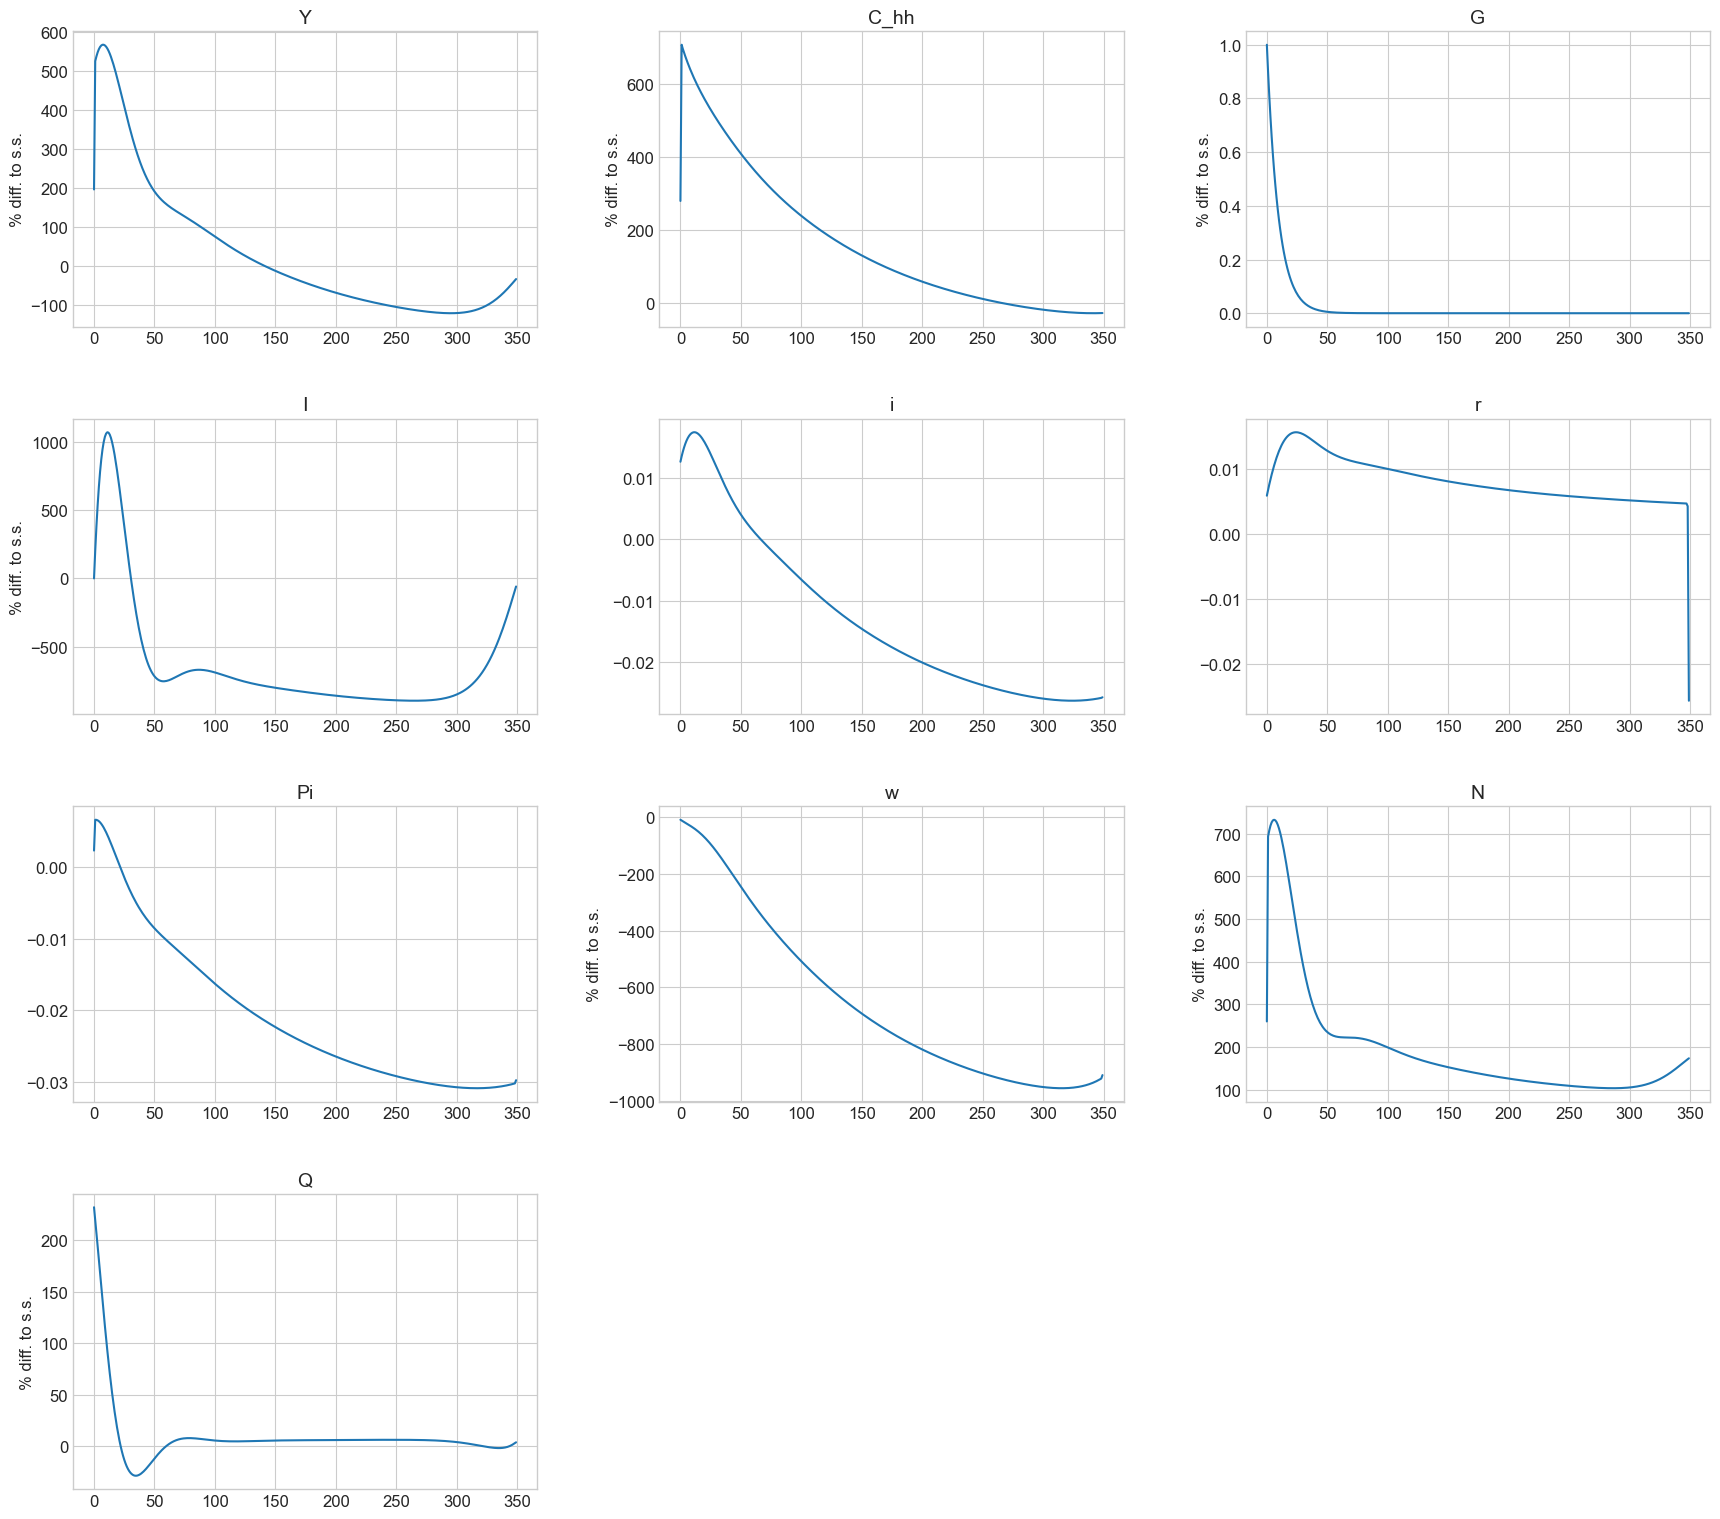


### tagets ###


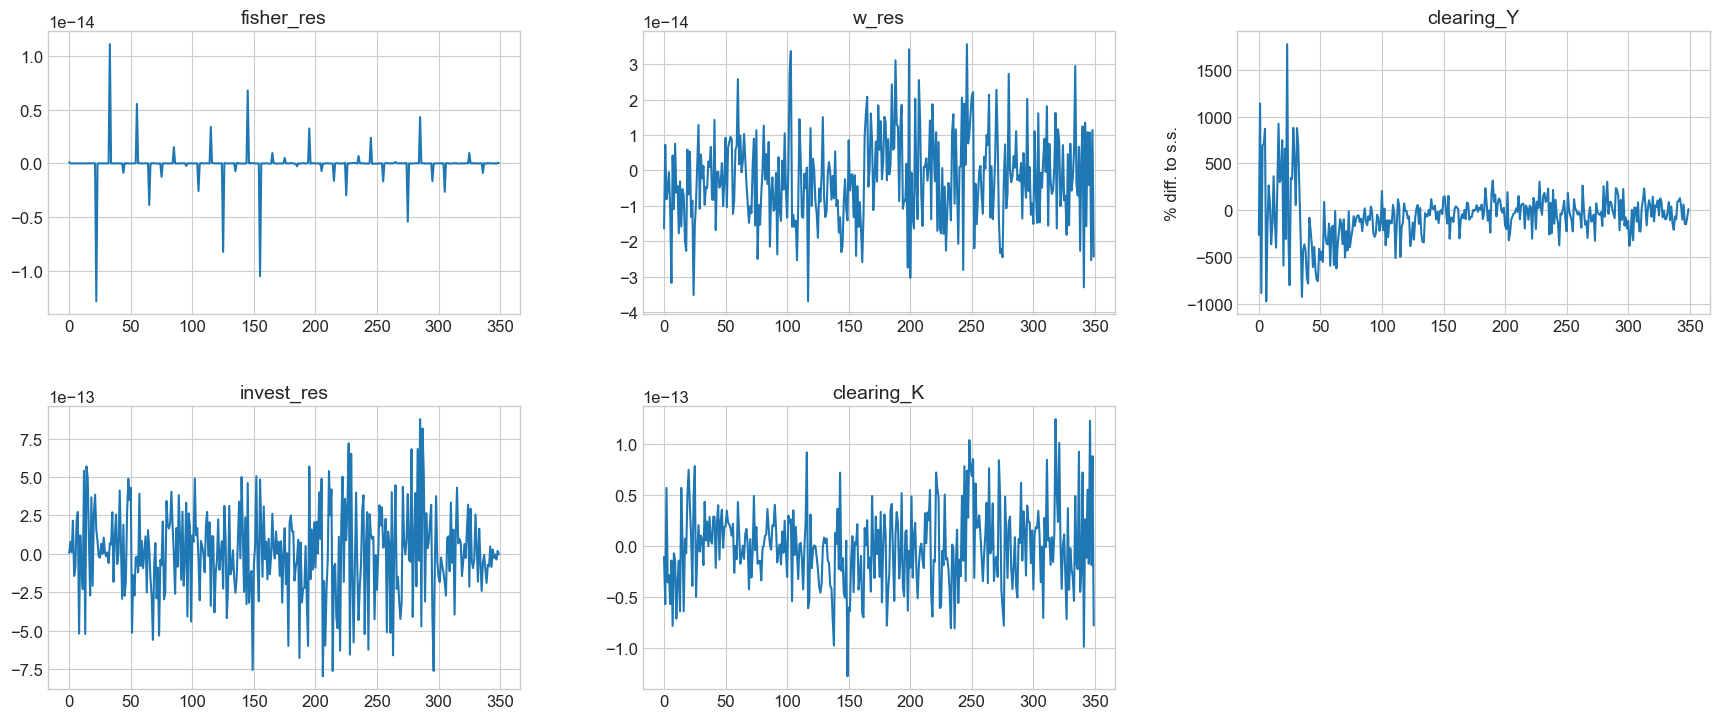

In [11]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'w', 'N', 'Q']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em',  'r', 'Pi', 'i', 'tau', 'rk']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)

# Misc

In [ ]:
# model.print_unpack_varlist()

In [ ]:
# model.check_non_lin(0)

In [ ]:
# print(np.max(path.A - path.A_hh))